Automatic (Data Logger) and Manual Ruapehu Crater Lake Temperature Measurement Summary
--

This version is for Brad Scott to use for GeoNet news stories or VABs
--

**Click Cell-> Run All to execute this notebook**

**Code can be optionally 'hidden'**

In [2]:
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
%matplotlib inline

In [3]:
style.use('fivethirtyeight')

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

**Automatic (Data Logger)**

This gets pretty much all recent data logger temperature data from RCL, the last 6000 days

In [5]:
url = 'http://fits.geonet.org.nz/observation?siteID=RU001&typeID=t&days=6000&methodID=logic'
df = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
df.head()

,t (C)
date-time,
2009-04-15 02:00:00,30.07
2009-04-15 03:00:00,29.25
2009-04-15 04:00:00,28.51
2009-04-15 05:00:00,27.22
2009-04-15 06:00:00,27.15


Data unevenly sampled, resample as daily mean to avoid any potential bias

In [6]:
dfday = df.resample('D').mean()

daily mean has some NaN values, days with no temperature measurements, drop rows with these

In [7]:
dfday.dropna(inplace=True)

In [8]:
dfday[' t (C)'].describe()

count    3213.000000
mean       25.861786
std         6.997782
min        12.595000
25%        20.583333
50%        23.945455
75%        31.547333
max        45.637083
Name:  t (C), dtype: float64

time-series plot, daily mean values only, superimpose median (red), 0.05, 0.95 (black)

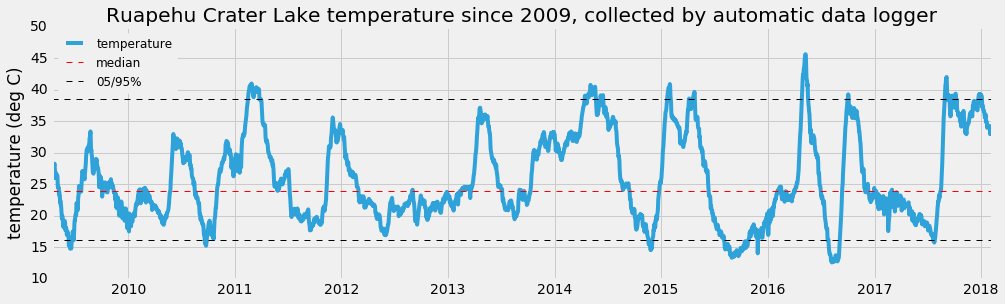

In [31]:
temp = dfday[' t (C)'].plot(figsize=(15,5), title='Ruapehu Crater Lake temperature since 2009, collected by automatic data logger', label='temperature')
temp.set_ylabel("temperature (deg C)")

temp.axhline(dfday[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

temp.axhline(dfday[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
temp.axhline(dfday[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)
temp.set_xlabel('')
plt.xticks(rotation='horizontal', ha='center')
tp = temp.legend(loc='best', fontsize=12)
from datetime import datetime

# The signature bar
#temp.text(x = '2009', y = 4,
    #s = '   GeoNet                                                                                                                                                              http://www.geonet.org.nz   ',
    #fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

In [81]:
fig = tp.get_figure()
fig.savefig('rcltemp-news_plot.png', dpi=200)

Histogram, one bin per degree

Bins for histograms, standardise across all plots

In [82]:
bins = np.arange(8,61,1)

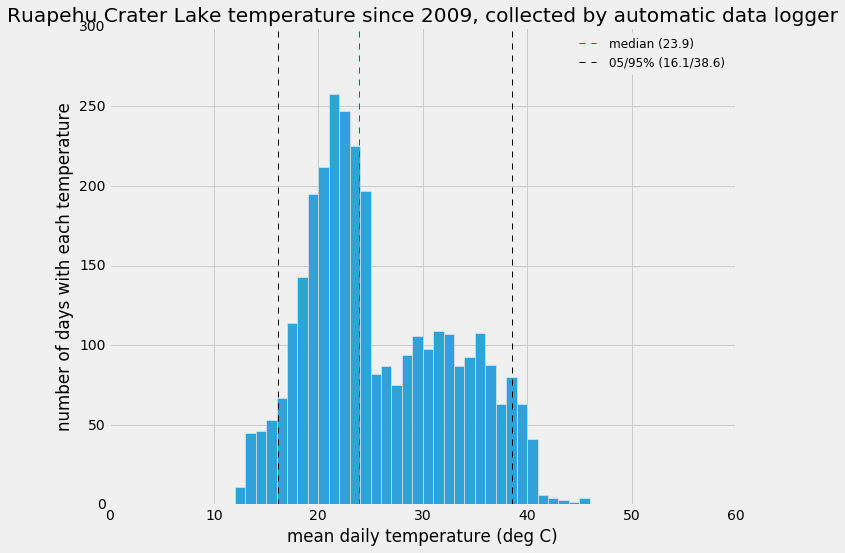

In [83]:
hist = dfday[' t (C)'].hist(bins=bins, figsize=(10,8))
hist.set_ylabel("number of days with each temperature")
hist.set_xlabel("mean daily temperature (deg C)")

#mean = dfday[' t (C)'].mean()
#meanstr = '{:.1f}'.format(mean)
#hist.axvline(mean, color='green', linestyle='dashed', linewidth=1, label='mean ('+meanstr+')')

median = dfday[' t (C)'].median()
medianstr = '{:.1f}'.format(median)
hist.axvline(median, color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q05 = dfday[' t (C)'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
hist.axvline(q05, color='black', linestyle='dashed', linewidth=1)
q95 = dfday[' t (C)'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
hist.axvline(q95, color='black', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

hist.set_title('Ruapehu Crater Lake temperature since 2009, collected by automatic data logger')
hp = hist.legend(loc='best', fontsize=12)


In [84]:
fig = hp.get_figure()
fig.savefig('rcltemp-news_hist.png', dpi=200)

**Manual**

All manual measured temperatures, regardless of siteID. There are some 'double-up' manual temperatures from 1991 to the 1995 eruption. The same observation has a methodID of both therm and thermcoup. This arose because of separate copies of data being held by different staff. This problem will be rectrified at a later date. 

In [85]:
#outlet, thermometer
url = 'http://fits.geonet.org.nz/observation?siteID=RU001&typeID=t&methodID=therm'
dfm = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])

#outlet, thermocouple
url = 'http://fits.geonet.org.nz/observation?siteID=RU001&typeID=t&methodID=thermcoup'
dfm2 = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
dfm = dfm.append(dfm2)

#centre, thermocouple
url = 'http://fits.geonet.org.nz/observation?siteID=RU003&typeID=t&methodID=thermcoup'
dfm3 = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
dfm = dfm.append(dfm3)

#north, thermocouple
url = 'http://fits.geonet.org.nz/observation?siteID=RU004&typeID=t&methodID=thermcoup'
dfm4 = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
dfm = dfm.append(dfm4)

In [86]:
dfm[' t (C)'].describe()

count    829.000000
mean      29.644632
std       10.653010
min        9.000000
25%       21.700000
50%       28.400000
75%       35.900000
max       69.000000
Name:  t (C), dtype: float64

In [87]:
dfm.head()

,t (C)
date-time,
1950-03-01,24.4
1954-02-14,22.3
1954-02-17,21.1
1954-10-22,38.0
1955-12-30,25.0


Remove observations before the 1995 eruption. These data are representative of a period when Brad considers the style of activity at Ruapehu was different from that after the 1995-96 eruptions.

In [88]:
dfmu = dfm[dfm.index<='1995-09-20 00:00:00']

In [89]:
dfmu[' t (C)'].describe()

count    495.000000
mean      30.391919
std       10.594058
min        9.000000
25%       22.500000
50%       30.000000
75%       38.000000
max       60.000000
Name:  t (C), dtype: float64

Time-series plot, raw data, daily mean values, superimpose median (red), 0.05, 0.95 (black). Plot all, including post-1995 data, but calculate statistics for only those before 1995 eruptions.

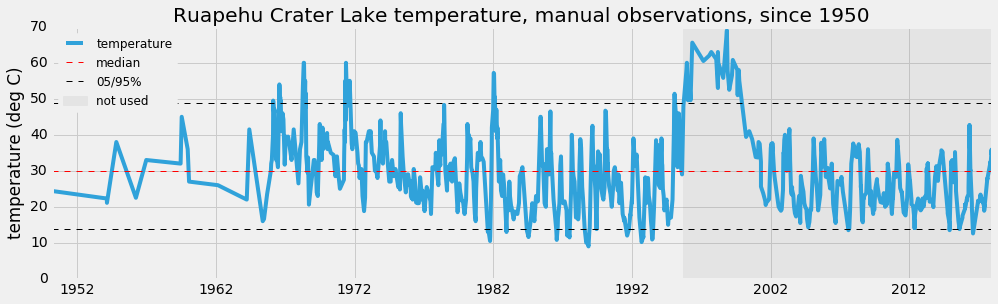

In [90]:
tempm = dfm[' t (C)'].plot(figsize=(15,5), title='Ruapehu Crater Lake temperature, manual observations, since 1950', label='temperature')
tempm.set_ylabel("temperature (deg C)")

tempm.axhline(dfmu[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

tempm.axhline(dfmu[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
tempm.axhline(dfmu[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)

tempm.axvspan('1995-09-20', '2020-01-01', alpha=0.1, color='gray', label='not used') #grey shade unused observations
tempm.set_xlabel('')
tp = tempm.legend(loc='best', fontsize=12)
plt.xticks(rotation='horizontal', ha='center')

fig = tp.get_figure()
fig.savefig('rcltemp_manual-news_plot.png', dpi=200)

histogram, one bin per degree

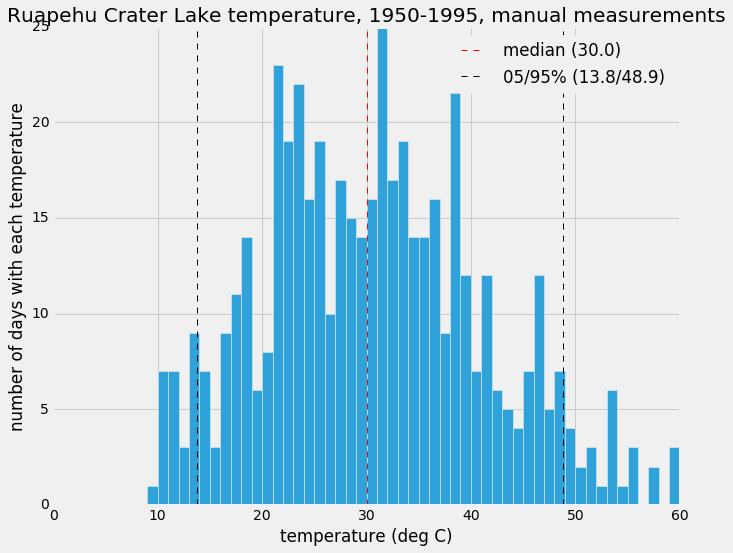

In [91]:
hist = dfmu[' t (C)'].hist(bins=bins, figsize=(10,8))
hist.set_ylabel("number of days with each temperature")
hist.set_xlabel("temperature (deg C)")

#mean = dfmu[' t (C)'].mean()
#meanstr = '{:.1f}'.format(mean)
#hist.axvline(mean, color='green', linestyle='dashed', linewidth=1, label='mean ('+meanstr+')')

median = dfmu[' t (C)'].median()
medianstr = '{:.1f}'.format(median)
hist.axvline(median, color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q05 = dfmu[' t (C)'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
hist.axvline(q05, color='black', linestyle='dashed', linewidth=1)
q95 = dfmu[' t (C)'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
hist.axvline(q95, color='black', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

hist.set_title("Ruapehu Crater Lake temperature, 1950-1995, manual measurements")
hp = hist.legend(loc='best')

fig = hp.get_figure()
fig.savefig('rcltemp_manual-news_hist.png', dpi=200)